### Student Information
Name:潘柏瑋

Student ID:110033649

GitHub ID:peterpan726

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

# First:
do the take home exercises in the DM2020-Lab1-Master Repo. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade.

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [6]:
# add category to the dataframe
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[0:10]
X[0:10][["text", "category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

# ** >>> Exercise 2 (take home):**
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [7]:
# Answer here
X.loc[[0, 2], 'text']

0    From: sd345@city.ac.uk (Michael Collier) Subje...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
Name: text, dtype: object

In [8]:
X.loc[lambda f:f.category_name == 'comp.graphics'].iloc[::10, :][0:5]
X.isnull().apply(lambda x: dmh.check_missing_values(x))
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])
result_with_series = X.append(dummy_series, ignore_index=True)
result_with_series

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2257                                       dummy_record         1   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  
2257                     NaN  

[2258 rows x 3 columns]

In [9]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]
X = X.append(dummy_dict, ignore_index=True)
X.dropna(inplace=True)

# >>> Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.
Please check the data and the process below, describe what you observe and why it happened.
𝐻𝑖𝑛𝑡
H
i
n
t
  : why .isnull() didn't work?

In [10]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [11]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

# Answer here
Because item in 'C','D','F', are string type

In [12]:
X_sample = X.sample(n=1000) #random state
X_sample[0:4]

text  category  \
147   From: mcovingt@aisun3.ai.uga.edu (Michael Covi...         3   
1909  From: tbrent@florin.ecn.purdue.edu (Timothy J ...         3   
346   From: darice@yoyo.cc.monash.edu.au (Fred Rice)...         0   
1039  From: euclid@mrcnext.cso.uiuc.edu (Euclid K.) ...         2   

               category_name  
147   soc.religion.christian  
1909  soc.religion.christian  
346              alt.atheism  
1039                 sci.med

# >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [13]:
# Answer here
X[0:9]
#I find no change in the dataframe.

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
4  soc.religion.christian  
5  soc.religion.christian  
6  soc.religion.christian  
7                 sci.med  
8                 sci.med

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

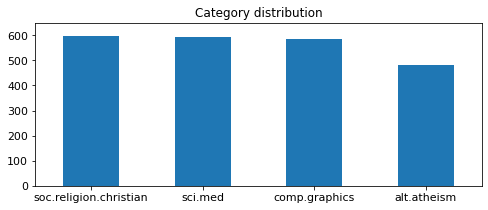

In [15]:
print(X.category_name.value_counts())

# plot barchart for X_sample
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   272
comp.graphics             262
soc.religion.christian    256
alt.atheism               210
Name: category_name, dtype: int64


<AxesSubplot:title={'center':'Category distribution'}>

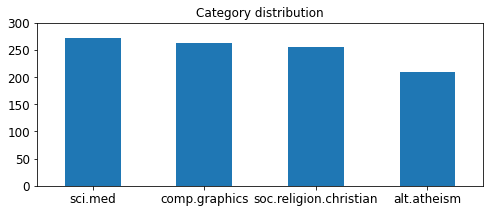

In [16]:
print(X_sample.category_name.value_counts())

# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot:title={'center':'Category distribution'}>

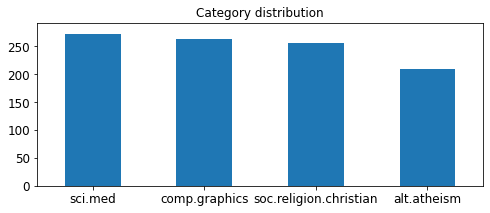

In [17]:
# Answer here
upper_bound = max(X_sample.category_name.value_counts()) + 20
# plot barchart for X_sample
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, upper_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

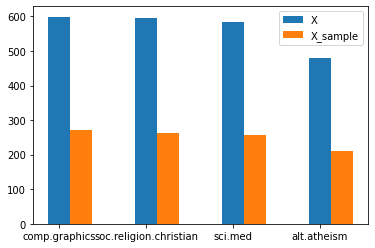

In [19]:
# Answer here
x_len = np.arange(4)
plt.bar(x_len + 0.00, X.category_name.value_counts(), width = 0.25,label='X')
plt.bar(x_len + 0.25, X_sample.category_name.value_counts(), width = 0.25, label='X_sample')
plt.xticks(x_len, X.category_name.unique())
plt.legend(loc='best')
plt.show()

In [20]:
import nltk
nltk.download('punkt')
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X[0:4]["unigrams"]
X[0:4]

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/peter3354152/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name                                           unigrams  
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...  
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()
analyze("Hello World!")
count_vect.get_feature_names()[0:10]
X_counts.shape
count_vect.get_feature_names()[0:10]
X[0:5]
X_counts[0:5, 0:100].toarray()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

# >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [22]:
# Answer here
a = X_counts[0:5, 0:100].toarray()
i, j = np.where(a == 1)
words = [count_vect.get_feature_names()[j[0]], count_vect.get_feature_names()[j[1]]]
print(words)

['00', '01']


In [23]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [24]:
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()

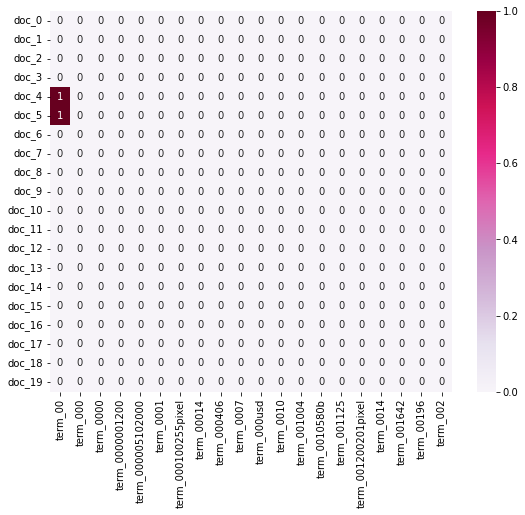

In [25]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


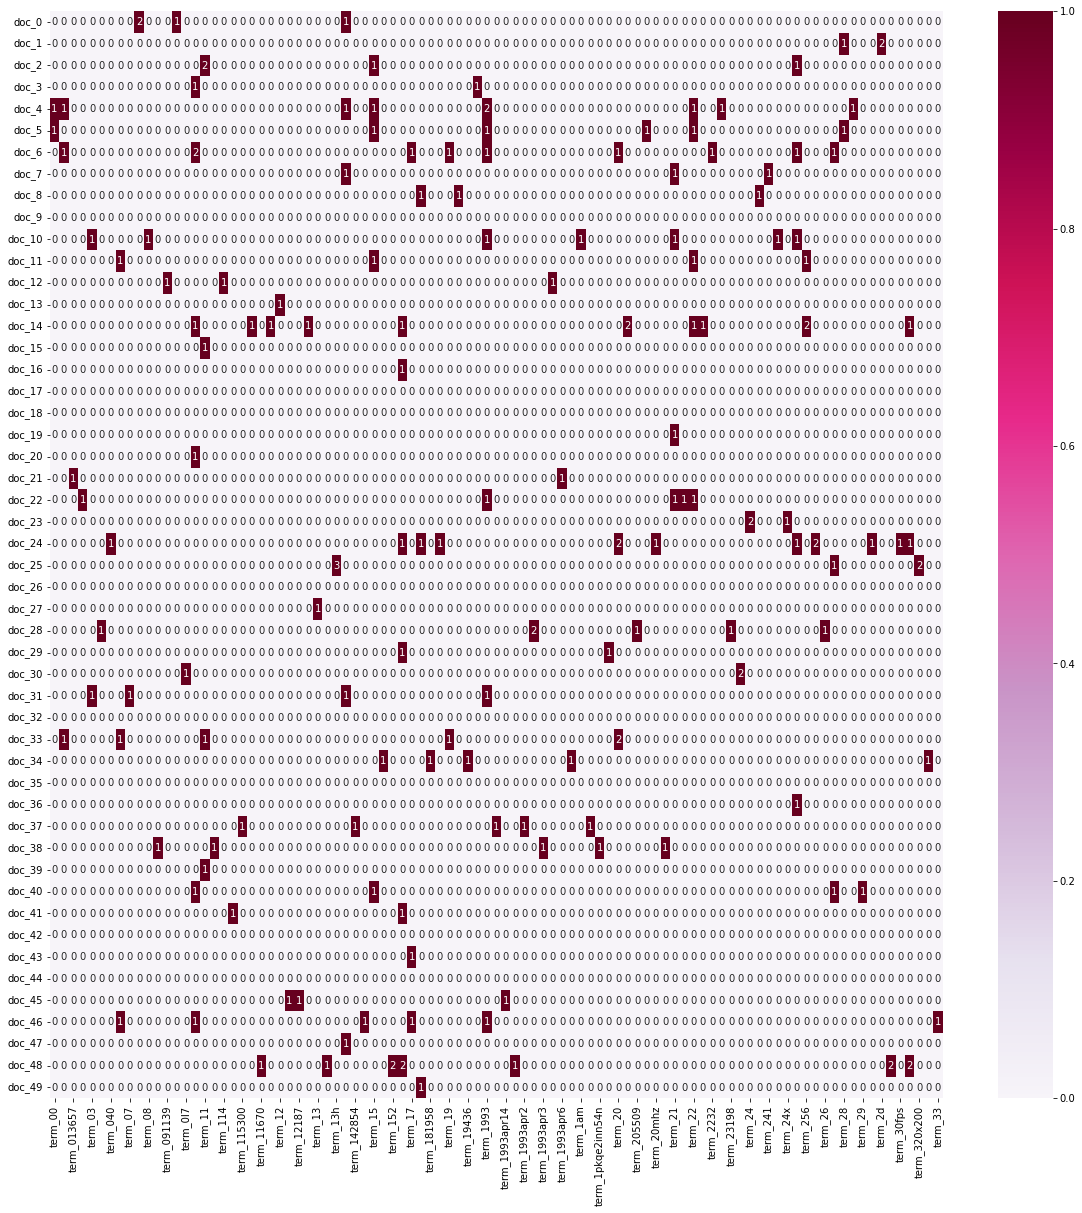

In [26]:
# Answer here
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:2000]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[0:50, 0:2000].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# df_todraw[0:10]
df_todraw = df_todraw[df_todraw.columns[df_todraw.sum()>0]]
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
#drop the column if its sum equal to 0

In [29]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print(X_reduced.shape)
print(categories)

(2257, 2)
['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']


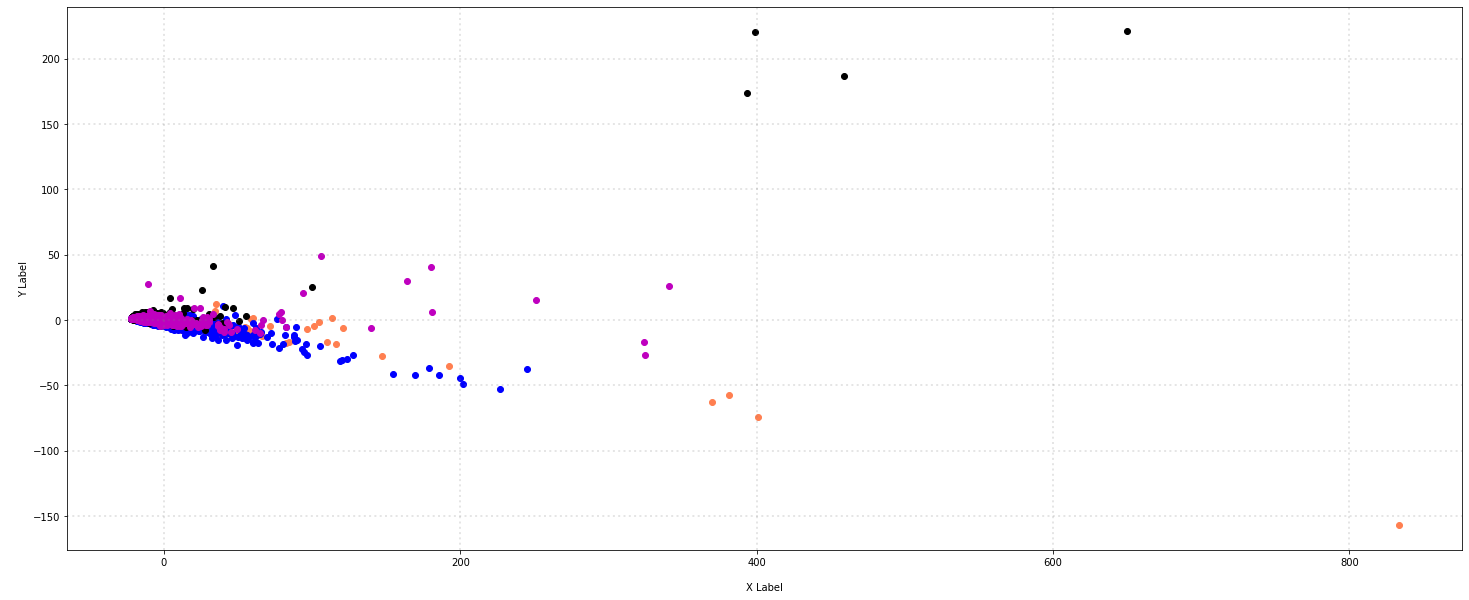

In [30]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

# >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.
𝐻𝑖𝑛𝑡
H
i
n
t
 : you can refer to Axes3D in the documentation.

/var/folders/kj/rln5s0_d7xnb_6k7gg9lv0g40000gn/T/ipykernel_6182/2040169165.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


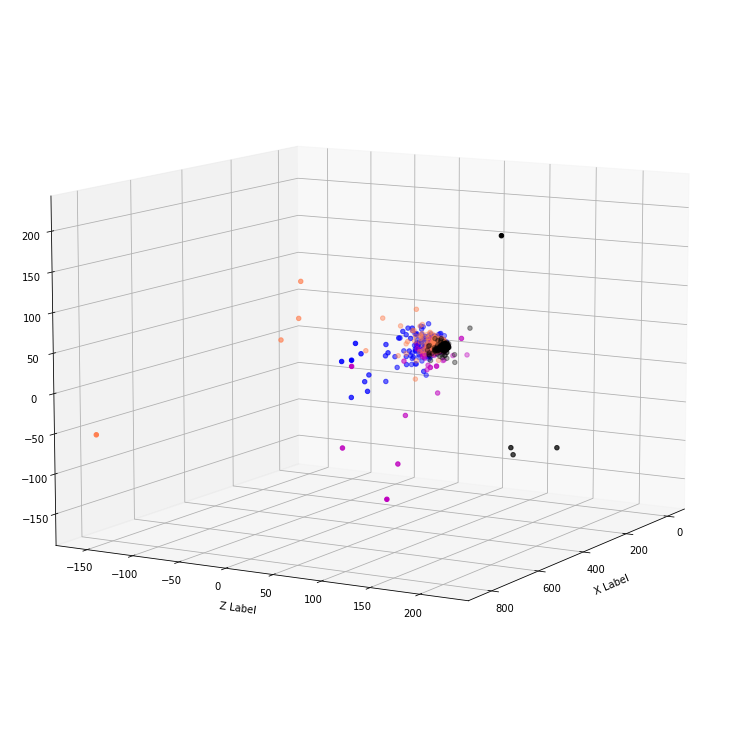

In [31]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=10., azim=30)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

/var/folders/kj/rln5s0_d7xnb_6k7gg9lv0g40000gn/T/ipykernel_6182/3696109451.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


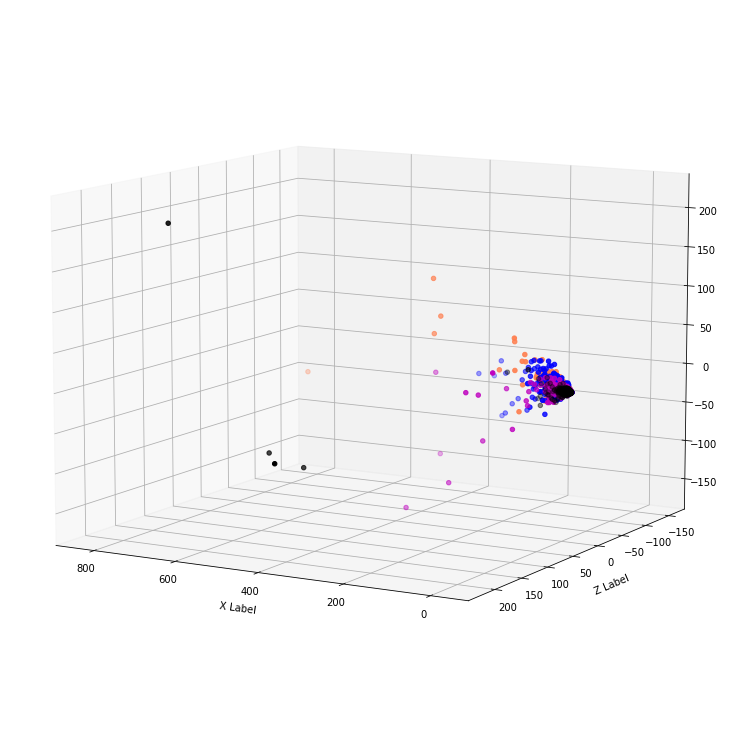

In [32]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=10., azim=120)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

/var/folders/kj/rln5s0_d7xnb_6k7gg9lv0g40000gn/T/ipykernel_6182/3772659196.py:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


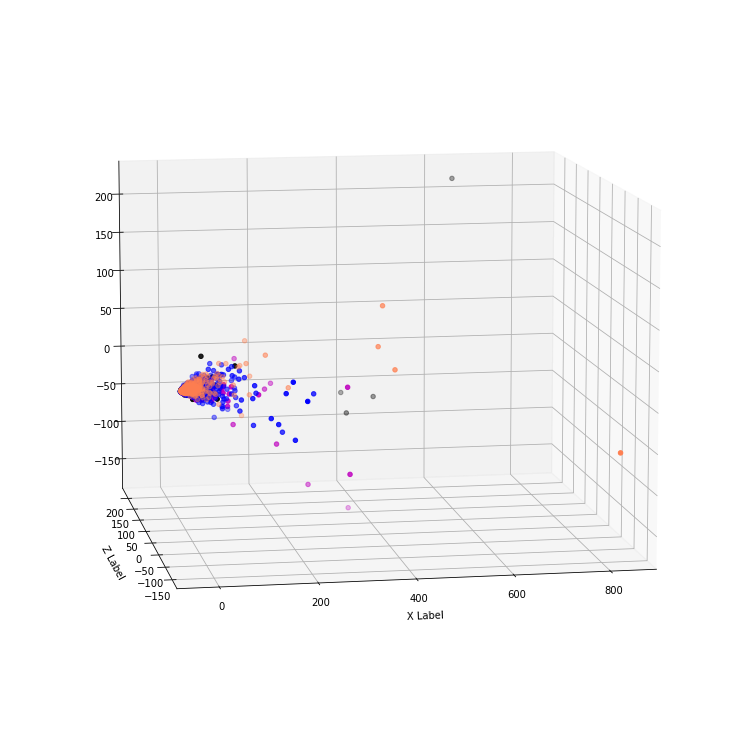

In [33]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=10., azim=260)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

#In exercise 12, I find that in different camera position, I can see different color on the top. It means that we need to view the 3d plot in different camera position and that we can get more infomation with data.

In [34]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]



134

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


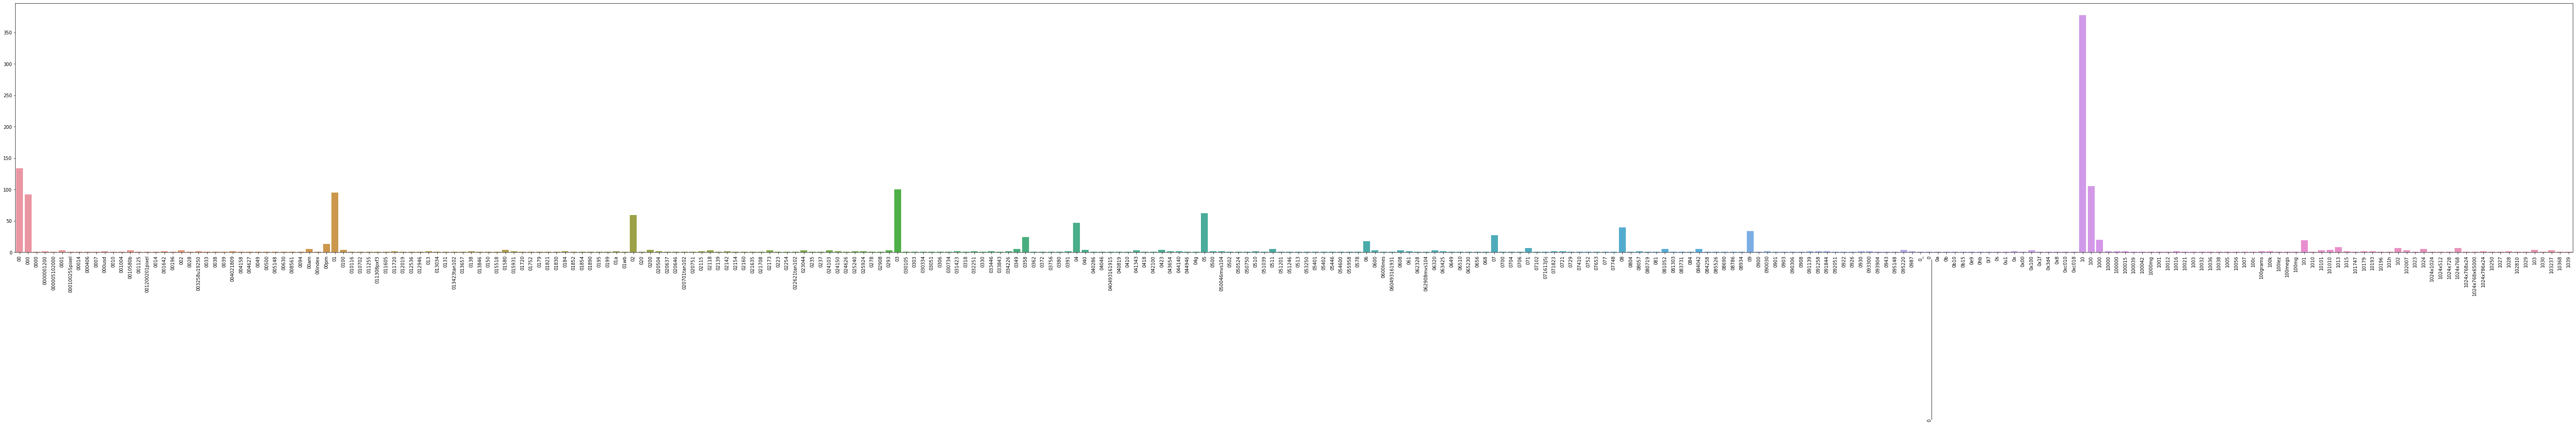

In [35]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

# >>> Exercise 13 (take home):
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [36]:
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.figure_factory as ff
 
fig = go.Figure(
    data=[go.Bar(y=term_frequencies[:300])],
)
fig.show()

# >>> Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



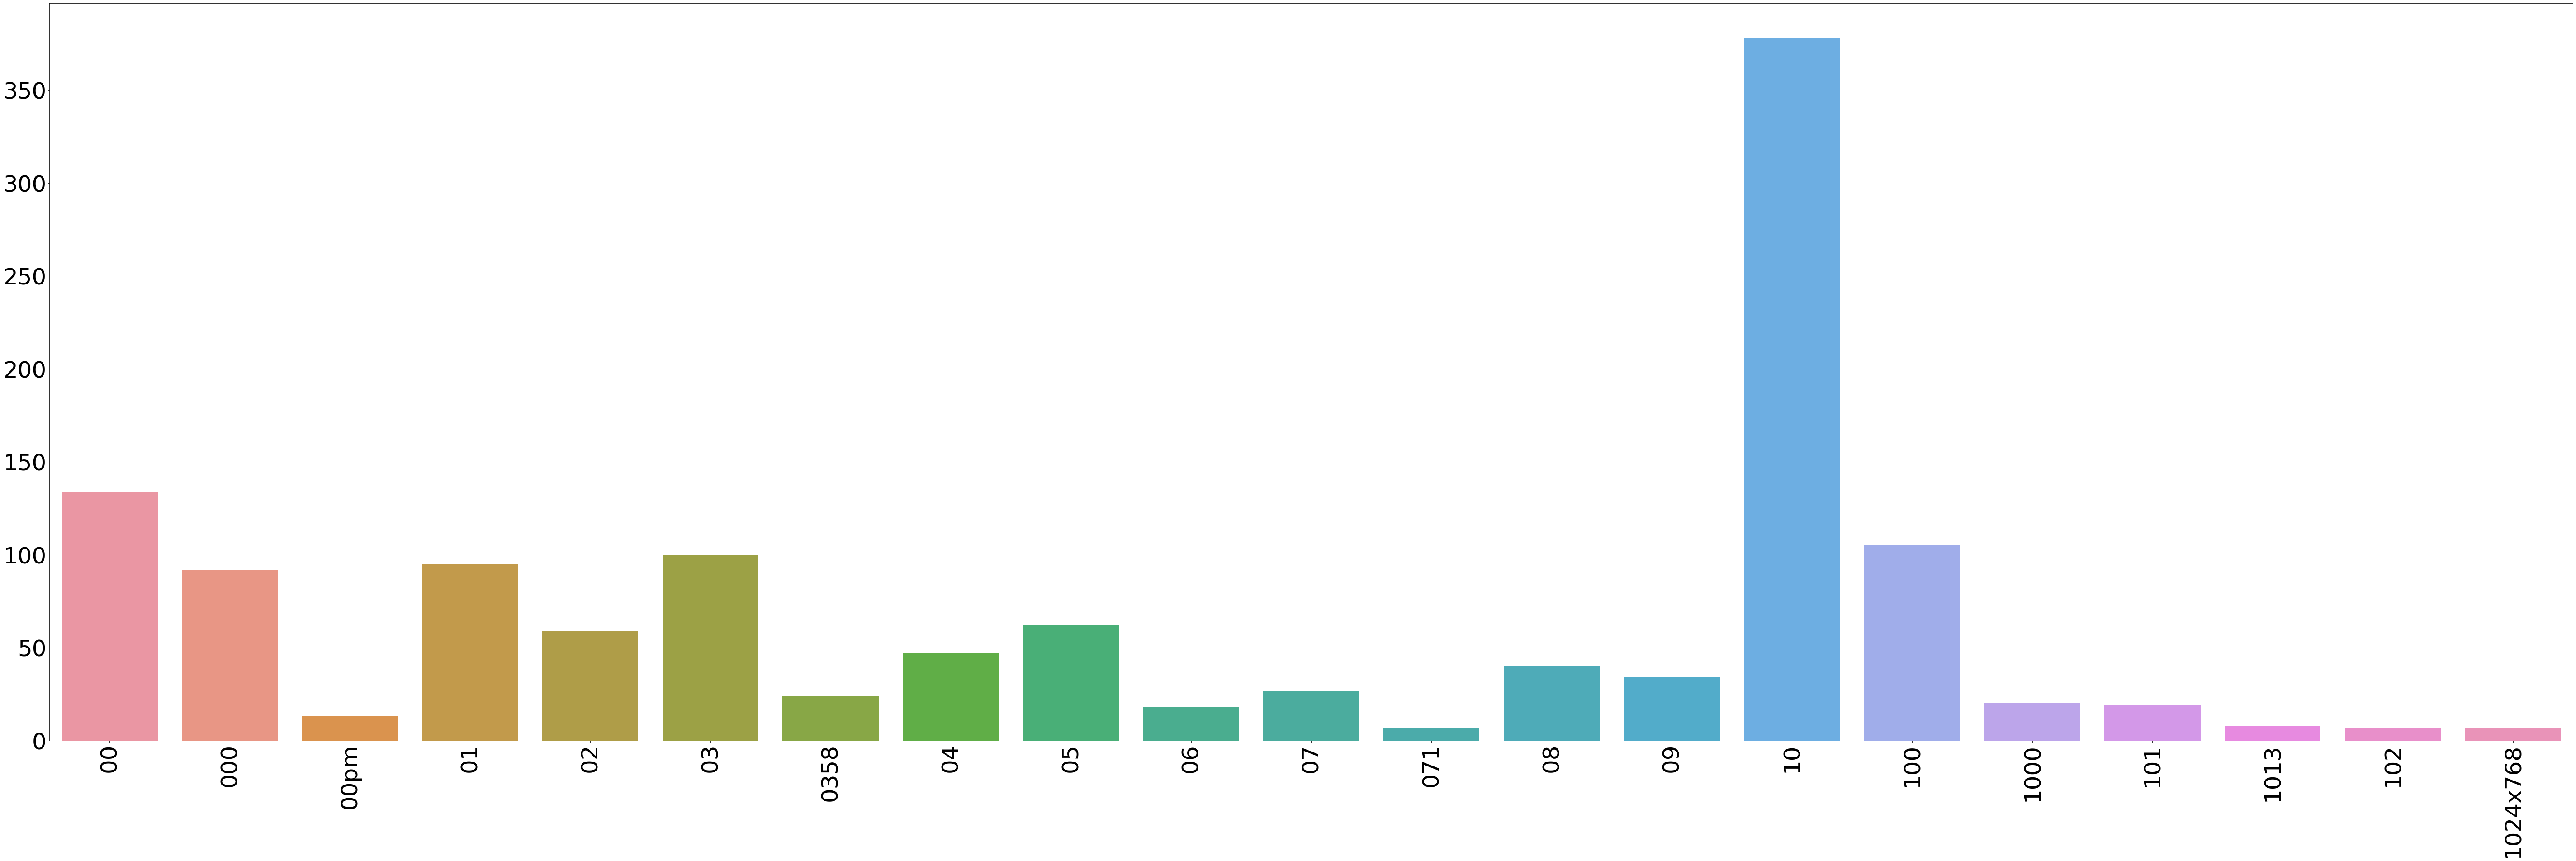

In [37]:
# Answer here
sns.set_context(rc={"font.size":50})   
plt.subplots(figsize=(100, 30))
x_ = []
y_ = []
for i in range(300):
    if term_frequencies[i] > 5:
        x_.append(count_vect.get_feature_names()[i])
        y_.append(term_frequencies[i])
g = sns.barplot(x=x_, y=y_)
g.set_xticklabels(x_, rotation = 90);

# >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



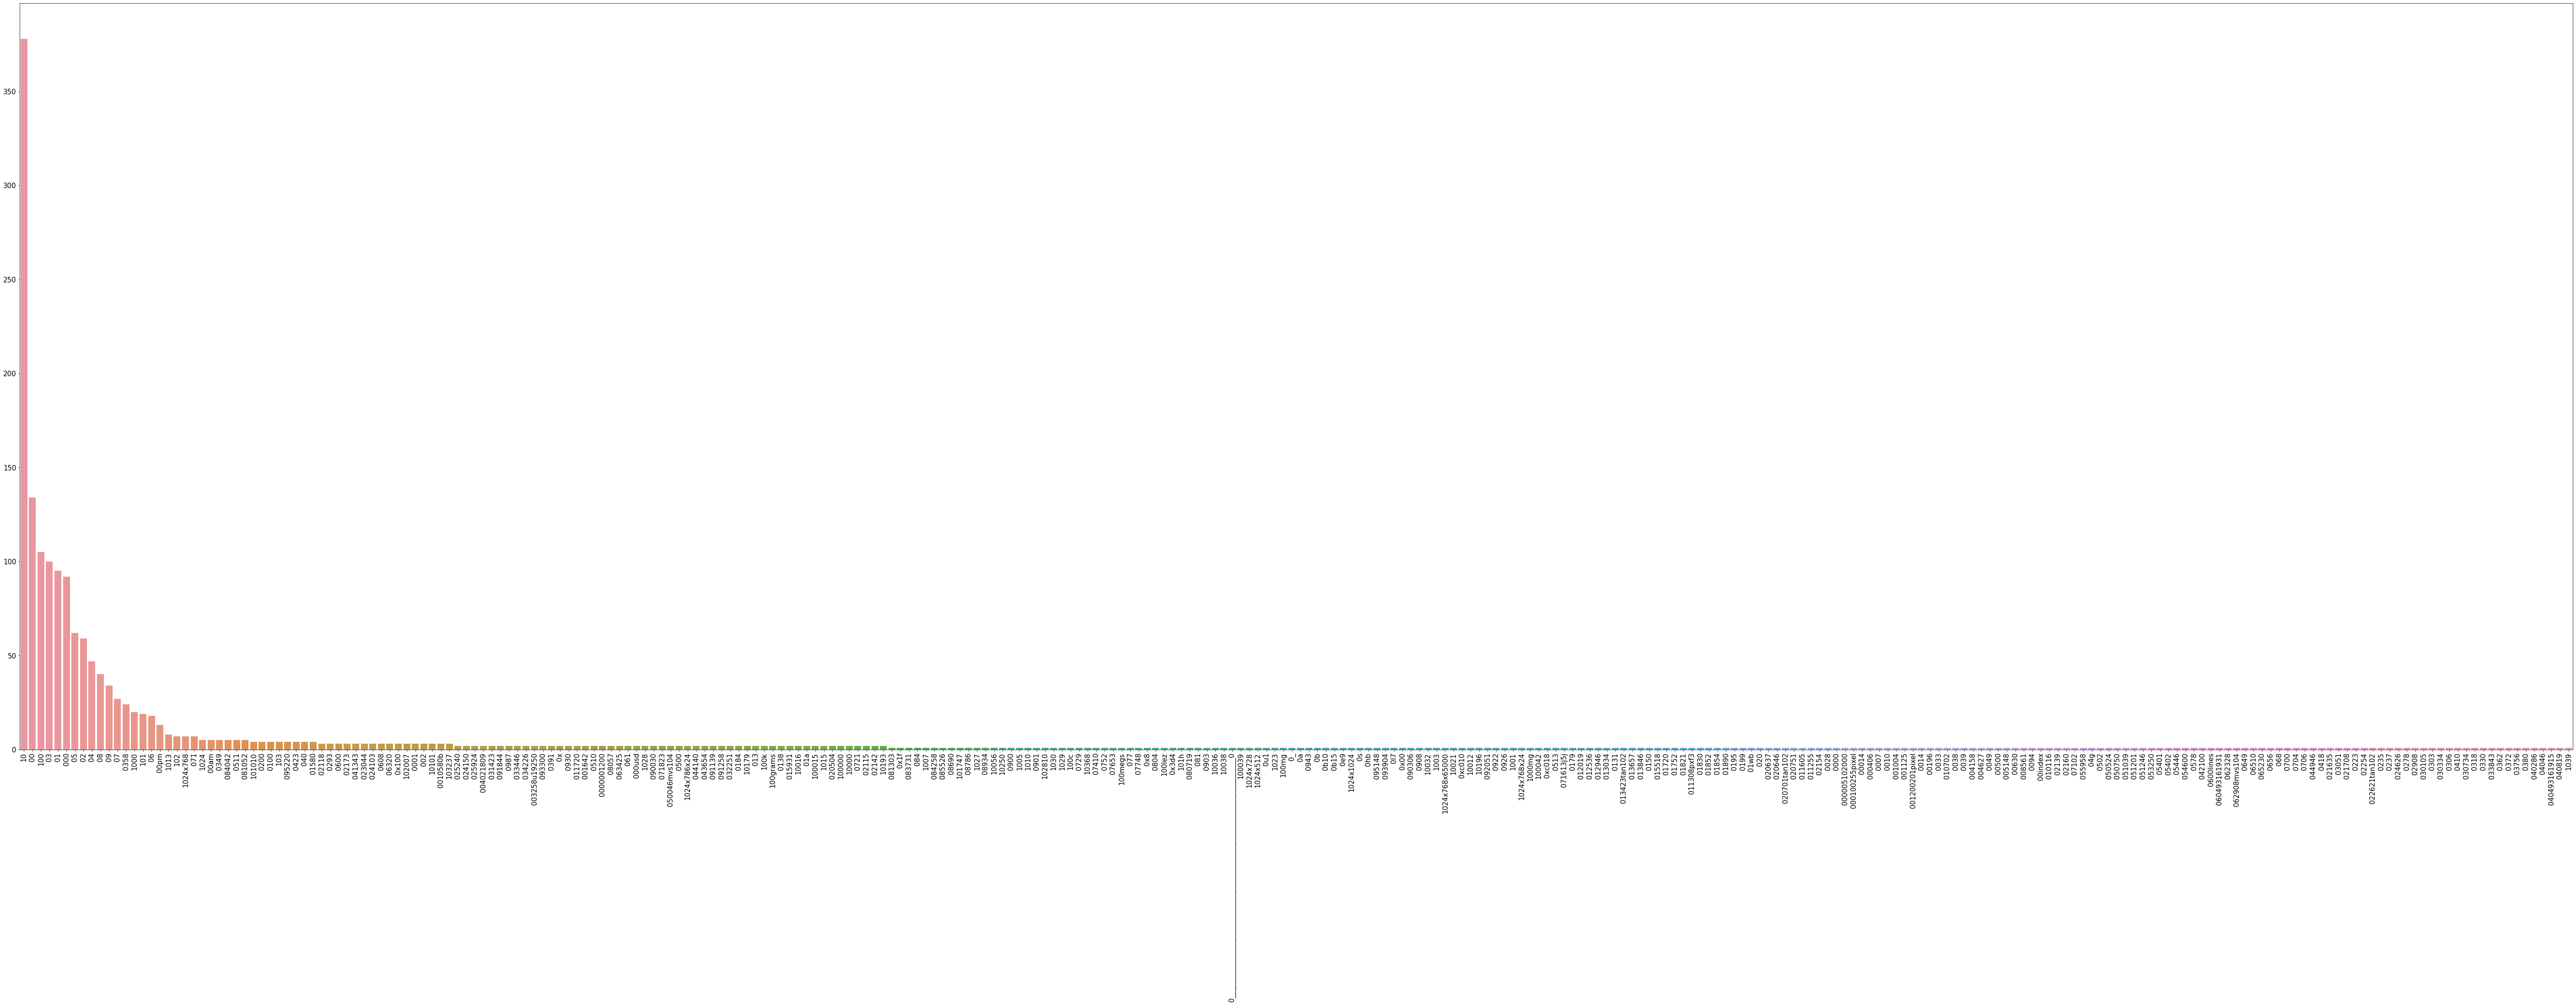

In [38]:
freq = {'name': count_vect.get_feature_names()[:300] ,
        'freq': term_frequencies[:300]}
df = pd.DataFrame(freq, columns = ['name', 'freq'])
final_df = df.sort_values(by=['freq'], ascending=False)
sns.set_context(rc={"font.size":15})   
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=list(final_df['name']), y=list(final_df['freq']))
g.set_xticklabels(list(final_df['name']), rotation = 90);

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



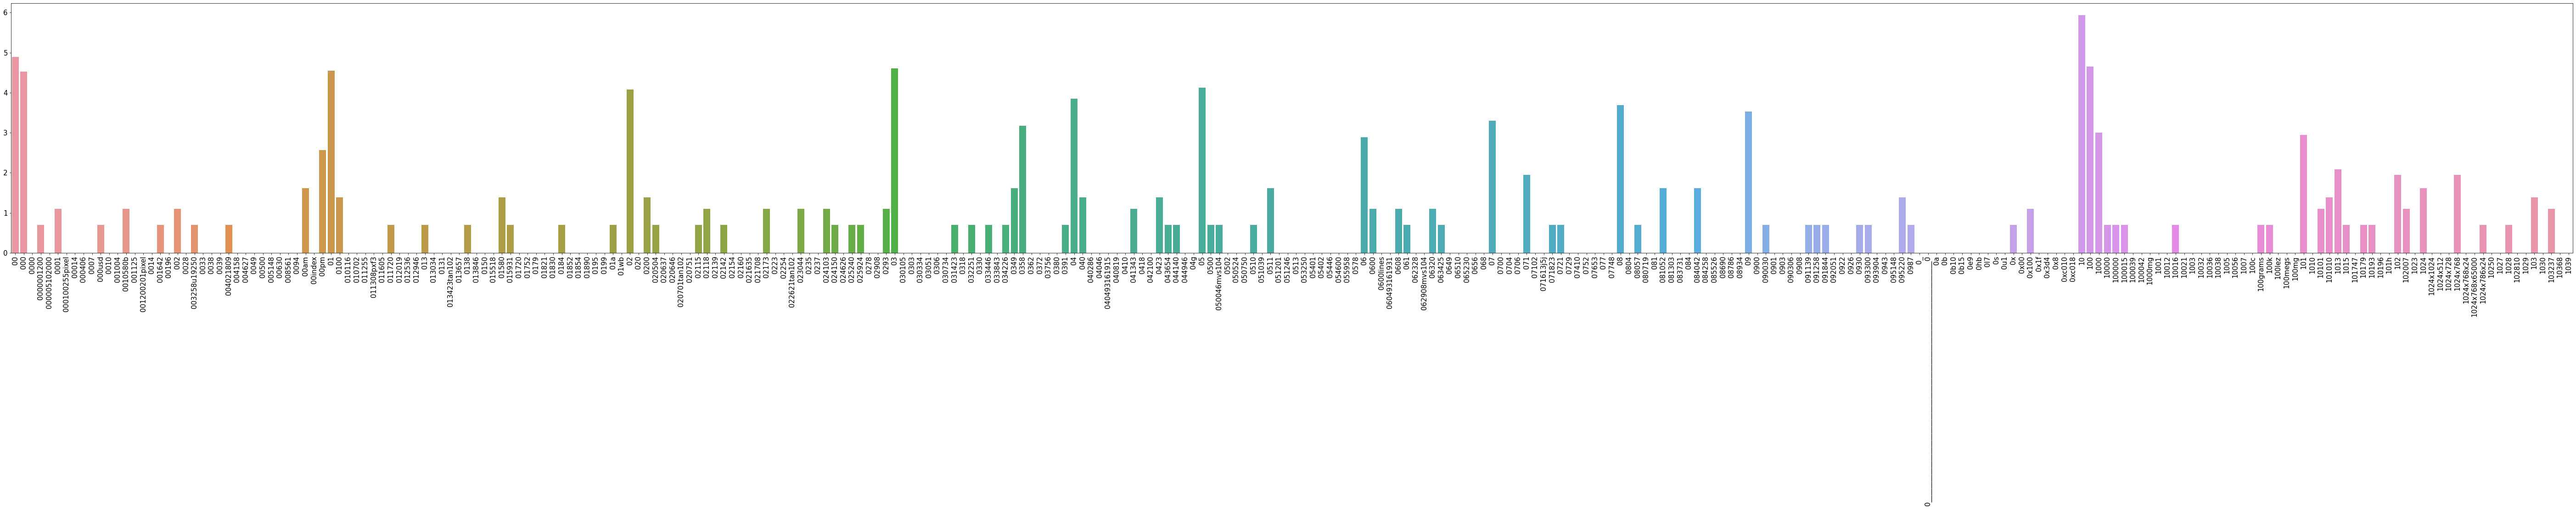

In [39]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [40]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
mlb.classes_
X['bin_category'] = mlb.transform(X['category']).tolist()
X[0:9]

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [41]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
mlb.classes_
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#Yes it work

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category bin_category_name  
0  [0, 1, 0, 0]      [0, 1, 0, 0]  
1  [0, 1, 0, 0]      [0, 1, 0, 0]  
2  [0, 0, 0, 1]      [0, 0, 0, 1]  
3  [0, 0, 0, 1]      [0, 0, 0, 1]  
4  [0, 0, 0, 1]      [0, 0, 0, 1]  
5  [0, 0, 0, 1]      [0, 0, 0, 1]  
6  [0, 0, 0, 1]      [0, 0, 0, 1]  
7  [0, 0, 1, 0]      [0, 0, 1, 0]  
8  [0, 0, 1, 0]      [0, 0, 1, 0]

# Second: 
follow the same process from the DM2020-Lab1-Master Repo on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.
Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.

In [42]:
f = open('sentiment labelled sentences/amazon_cells_labelled.txt', 'r')
lines = f.readlines()
f.close()
web = []
sentences = []
label = []
for line in lines:
    web.append('amazon')
    sentences.append(line.split("\t")[0])
    label.append(line.split("\t")[1].strip())
f = open('sentiment labelled sentences/imdb_labelled.txt', 'r')
lines = f.readlines()
f.close()
for line in lines:
    web.append('imdb')
    sentences.append(line.split("\t")[0])
    label.append(line.split("\t")[1].strip())
f = open('sentiment labelled sentences/yelp_labelled.txt', 'r')
lines = f.readlines()
f.close()
for line in lines:
    web.append('yelp')
    sentences.append(line.split("\t")[0])
    label.append(line.split("\t")[1].strip())

In [43]:
data = {'Web':  web,
        'Sentences': sentences,
        'Label': label
        }

X = pd.DataFrame (data, columns = ['Web','Sentences','Label'])
X.head()

Web                                          Sentences Label
0  amazon  So there is no way for me to plug it in here i...     0
1  amazon                        Good case, Excellent value.     1
2  amazon                             Great for the jawbone.     1
3  amazon  Tied to charger for conversations lasting more...     0
4  amazon                                  The mic is great.     1

# ** >>> Exercise 3 (5 min): **
Try to fecth records belonging to the comp.graphics category, and query every 10th record. Only show the first 5 records.

In [44]:
# Answer here
X.loc[lambda f:f.Label == '0'].iloc[::10, :][0:5]

Web                                          Sentences Label
0   amazon  So there is no way for me to plug it in here i...     0
20  amazon  I went on Motorola's website and followed all ...     0
37  amazon                        Poor Talk Time Performance.     0
60  amazon  Essentially you can forget Microsoft's tech su...     0
83  amazon                     The battery runs down quickly.     0

# 4. Data Mining using Pandas

# 4.1 Missing Values

In [45]:
X.isnull()

Web  Sentences  Label
0     False      False  False
1     False      False  False
2     False      False  False
3     False      False  False
4     False      False  False
...     ...        ...    ...
2995  False      False  False
2996  False      False  False
2997  False      False  False
2998  False      False  False
2999  False      False  False

[3000 rows x 3 columns]

In [46]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Web                           Sentences  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                Label  
0  The amoung of missing records is:   
1                                   0

# >>> Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
𝐻𝑖𝑛𝑡
H
i
n
t
  : axis parameter. Check the documentation for more information.

In [47]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

In [48]:
dummy_series = pd.Series(["dummy_record", 1], index=["Web", "Sentences"])
dummy_series

Web          dummy_record
Sentences               1
dtype: object

In [49]:
result_with_series = X.append(dummy_series, ignore_index=True)
result_with_series

Web                                          Sentences Label
0           amazon  So there is no way for me to plug it in here i...     0
1           amazon                        Good case, Excellent value.     1
2           amazon                             Great for the jawbone.     1
3           amazon  Tied to charger for conversations lasting more...     0
4           amazon                                  The mic is great.     1
...            ...                                                ...   ...
2996          yelp                           Appetite instantly gone.     0
2997          yelp  Overall I was not impressed and would not go b...     0
2998          yelp  The whole experience was underwhelming, and I ...     0
2999          yelp  Then, as if I hadn't wasted enough of my life ...     0
3000  dummy_record                                                  1   NaN

[3001 rows x 3 columns]

In [50]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

Web                           Sentences  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                Label  
0  The amoung of missing records is:   
1                                   1

In [51]:
# dummy record as dictionary format
dummy_dict = [{'Web': 'dummy_record',
               'Sentences': 1
              }]
X = X.append(dummy_dict, ignore_index=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Web                           Sentences  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                Label  
0  The amoung of missing records is:   
1                                   1

In [52]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

Web                           Sentences  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                                Label  
0  The amoung of missing records is:   
1                                   0

# 4.2 Dealing with Duplicate Data

In [53]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [54]:
sum(X.duplicated())

17

In [55]:
sum(X.duplicated('Sentences'))

17

In [56]:
len(X)

3000

In [57]:
X.drop_duplicates(keep=False, inplace=True)
len(X)

2966

# 5. Data Preprocessing

In [58]:
X_sample = X.sample(n=1000)
X_sample[0:4]

Web                                          Sentences Label
2948    yelp         This place is horrible and way overpriced.     0
453   amazon  I even fully charged it before I went to bed a...     0
2784    yelp  The chains, which I'm no fan of, beat this pla...     0
857   amazon                                        (It works!)     1

In [59]:
X[1105:1110]

Web                                          Sentences Label
1127  imdb  My only problem is I thought the actor playing...     0
1128  imdb  It rocked my world and is certainly a must see...     1
1129  imdb  However, this didn't make up for the fact that...     0
1130  imdb  There was NO chemistry between Ben Affleck and...     0
1131  imdb  There were several moments in the movie that j...     0

imdb      994
yelp      992
amazon    980
Name: Web, dtype: int64


<AxesSubplot:title={'center':'Web distribution'}>

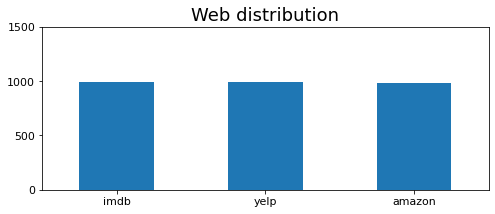

In [60]:
print(X.Web.value_counts())

# plot barchart for X_sample
X.Web.value_counts().plot(kind = 'bar',
                                    title = 'Web distribution',
                                    ylim = [0, 1500],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon    344
imdb      335
yelp      321
Name: Web, dtype: int64


<AxesSubplot:title={'center':'Web distribution'}>

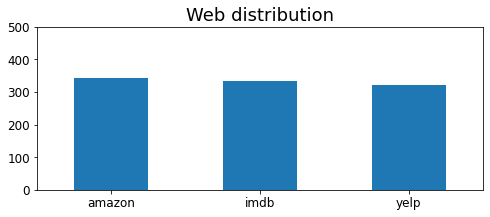

In [61]:
print(X_sample.Web.value_counts())

# plot barchart for X_sample
X_sample.Web.value_counts().plot(kind = 'bar',
                                           title = 'Web distribution',
                                           ylim = [0, 500], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

# >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

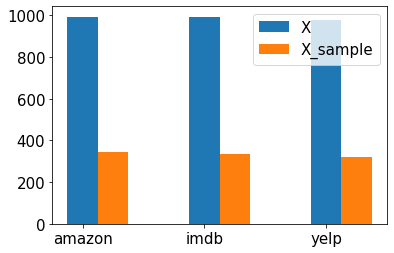

In [62]:
# Answer here
x_len = np.arange(3)
plt.bar(x_len + 0.00, X.Web.value_counts(), width = 0.25,label='X')
plt.bar(x_len + 0.25, X_sample.Web.value_counts(), width = 0.25, label='X_sample')
plt.xticks(x_len, X.Web.unique())
plt.legend(loc='best')
plt.show()

# 5.3 Feature subset selection

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.Sentences)
print(X_counts)

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1
  (1, 1992)	1
  (1, 712)	1
  (1, 1602)	1
  (1, 4859)	1
  (2, 1828)	1
  (2, 4529)	1
  (2, 2022)	1
  :	:
  (2965, 4543)	1
  (2965, 4607)	1
  (2965, 2431)	1
  (2965, 2313)	1
  (2965, 4529)	3
  (2965, 646)	1
  (2965, 2281)	1
  (2965, 4540)	1
  (2965, 3096)	1
  (2965, 4972)	1
  (2965, 2981)	1
  (2965, 4591)	1
  (2965, 297)	1
  (2965, 3165)	1
  (2965, 2629)	1
  (2965, 1539)	1
  (2965, 4546)	1
  (2965, 784)	1
  (2965, 4628)	1
  (2965, 588)	1
  (2965, 2067)	1
  (2965, 3855)	1
  (2965, 3435)	1
  (2965, 5108)	1
  (2965, 1386)	1


In [64]:
print(X_counts.shape)
count_vect.get_feature_names()[0:10]

(2966, 5153)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [65]:
X[0:5]

Web                                          Sentences Label
0  amazon  So there is no way for me to plug it in here i...     0
1  amazon                        Good case, Excellent value.     1
2  amazon                             Great for the jawbone.     1
3  amazon  Tied to charger for conversations lasting more...     0
4  amazon                                  The mic is great.     1

In [66]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

# >>> Exercise 10 (take home):
We said that the 1 at the beginning of the fifth record represents the 00 term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [67]:
# Answer here
a = X_counts[0:5, 0:100].toarray()
i, j = np.where(a == 1)
words = [count_vect.get_feature_names()[j[0]]]
print(words)

['45']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [68]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[30:50]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[30:50]]
plot_z = X_counts[30:50, 30:50].toarray()

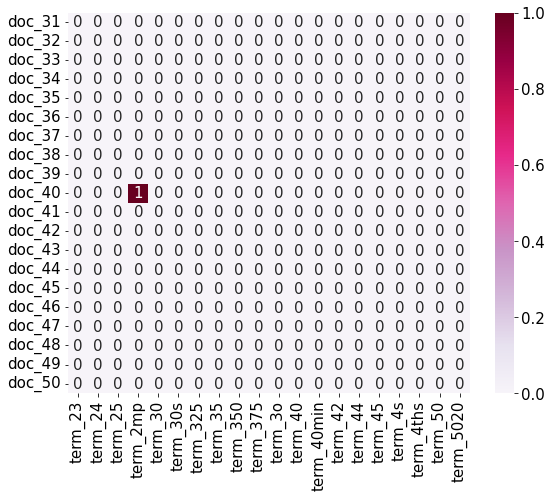

In [69]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

# >>> Exercise 11 (take home):
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of 1 in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

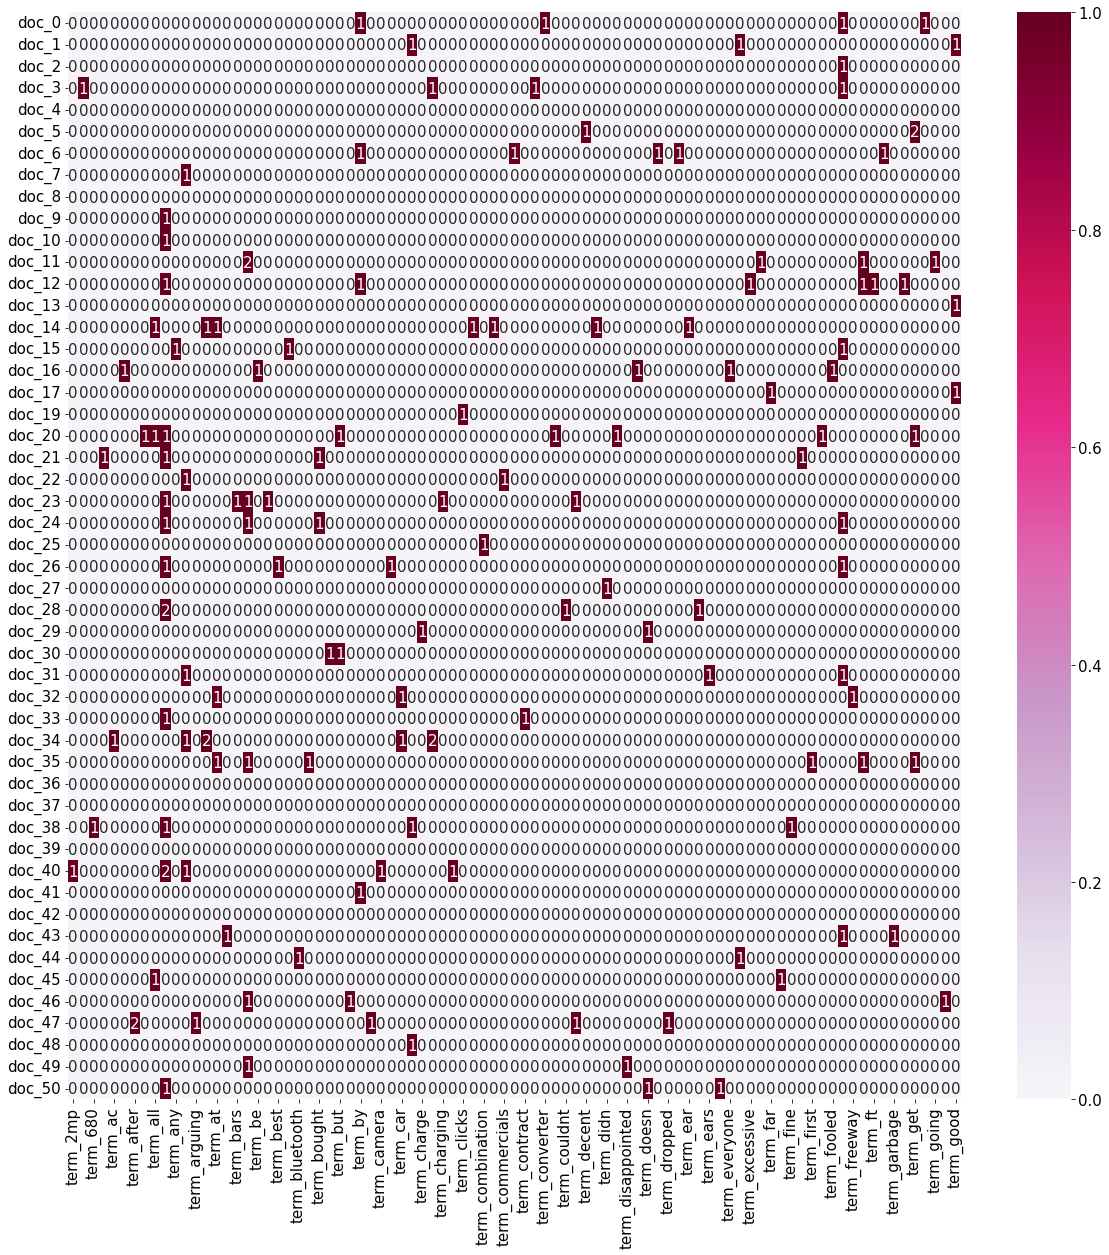

In [70]:
# Answer here
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:2000]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:50]]
plot_z = X_counts[0:50, 0:2000].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# df_todraw[0:10]
df_todraw = df_todraw[df_todraw.columns[df_todraw.sum()>0]]
plt.subplots(figsize=(20, 20))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
#drop the column if its sum equal to 0

### 5.4 Dimensionality Reduction
Since we have just touched on the concept of sparsity most naturally the problem of "curse of dimentionality" comes up. I am not going to get into the full details of what dimensionality reduction is and what it is good for just the fact that is an excellent technique for visualizing data efficiently (please refer to notes for more information). All I can say is that we are going to deal with the issue of sparsity with a few lines of code. And we are going to try to visualize our data more efficiently with the results.

We are going to make use of Principal Component Analysis to efficeintly reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [71]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
X_reduced.shape

(2966, 2)

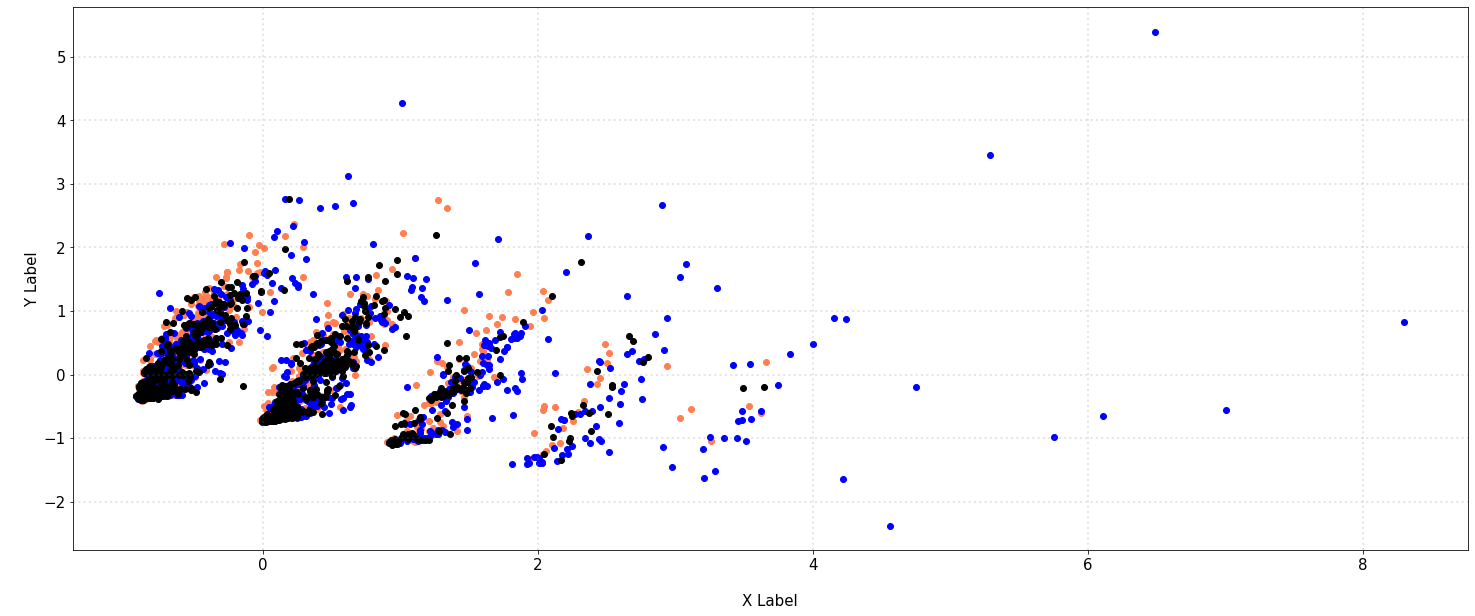

In [72]:
categories = ['amazon', 'imdb', 'yelp']
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['Web'] == category].T[0]
    ys = X_reduced[X['Web'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

/var/folders/kj/rln5s0_d7xnb_6k7gg9lv0g40000gn/T/ipykernel_6182/2934859790.py:8: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



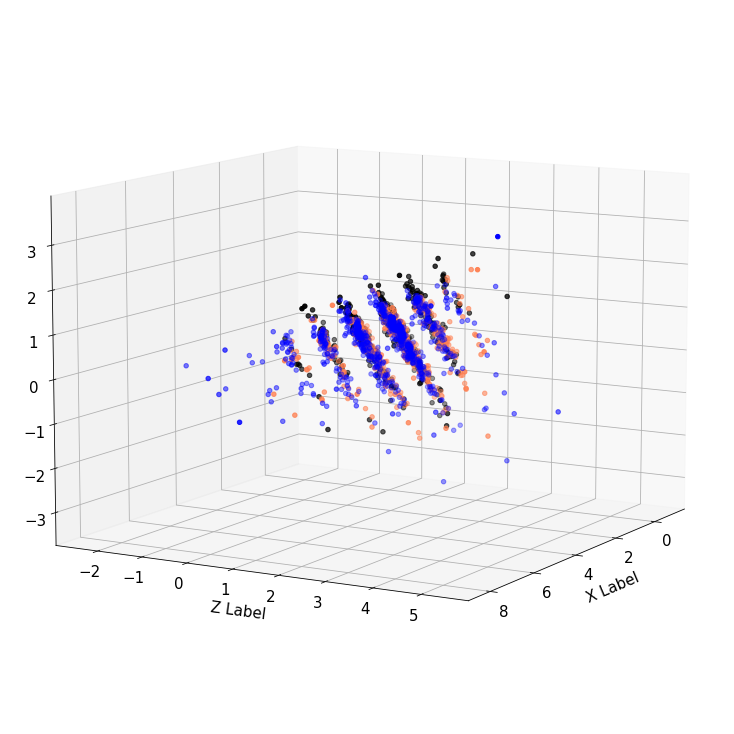

In [73]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['Web'] == category].T[0]
    ys = X_reduced[X['Web'] == category].T[1]
    zs = X_reduced[X['Web'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=10., azim=30)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

/var/folders/kj/rln5s0_d7xnb_6k7gg9lv0g40000gn/T/ipykernel_6182/3106053375.py:8: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



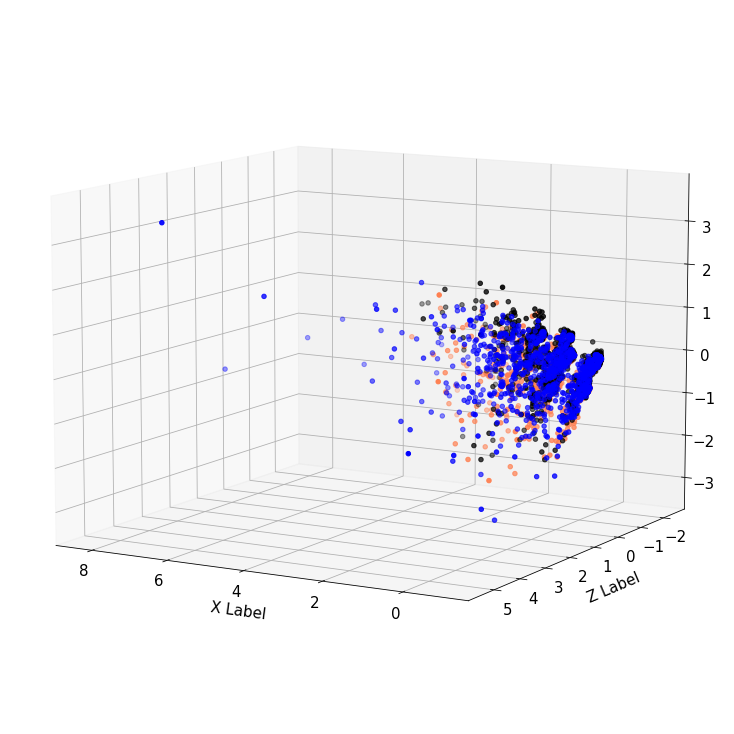

In [74]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['Web'] == category].T[0]
    ys = X_reduced[X['Web'] == category].T[1]
    zs = X_reduced[X['Web'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=10., azim=120)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

/var/folders/kj/rln5s0_d7xnb_6k7gg9lv0g40000gn/T/ipykernel_6182/4139214335.py:8: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



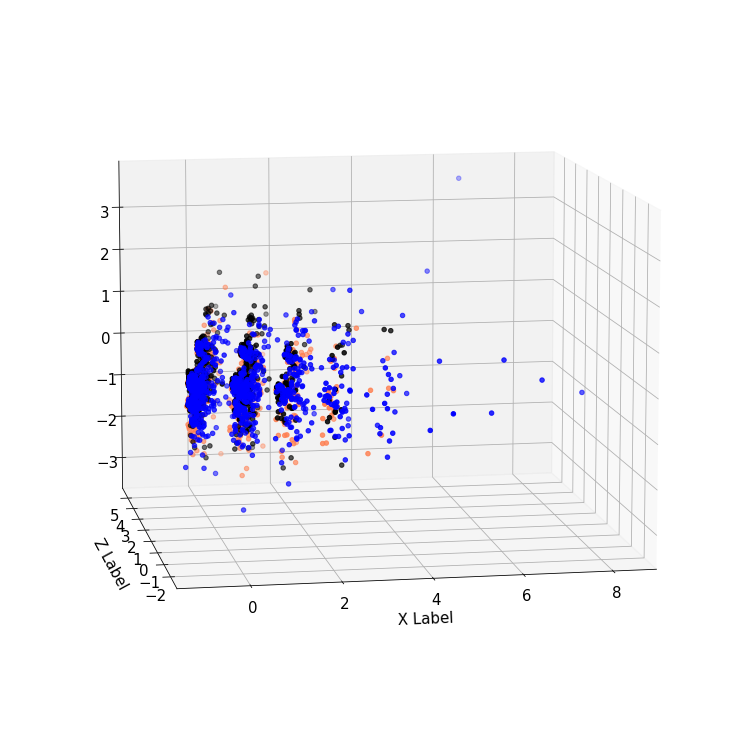

In [75]:
# Answer here
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax=Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['Web'] == category].T[0]
    ys = X_reduced[X['Web'] == category].T[1]
    zs = X_reduced[X['Web'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ax.view_init(elev=10., azim=260)
    
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_ylabel('\nZ Label')

plt.show()

#In exercise 12, I find that in different camera position, I can see different color on the top. It means that we need to view the 3d plot in different camera position and that we can get more infomation with data.

### 5.5 Atrribute Transformation / Aggregation
We can do other things with the term-vector matrix besides applying dimensionalaity reduction technique to deal with sparsity problem. Here we are going to generate a simple distribution of the words found in all the entire set of articles. Intuitively, this may not make any sense, but in data science sometimes we take some things for granted, and we just have to explore the data first before making any premature conclusions. On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Let us get into it!

In [76]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



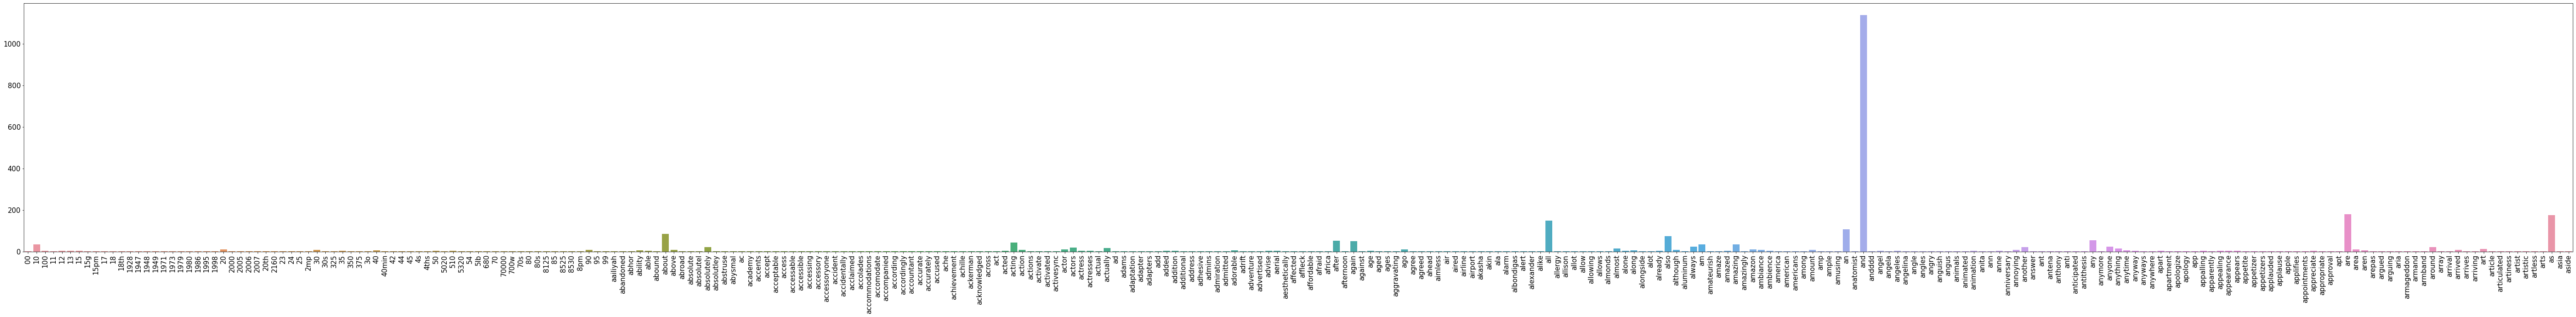

In [77]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [78]:
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.figure_factory as ff
 
fig = go.Figure(
    data=[go.Bar(y=term_frequencies[:300])],
)
fig.show()

# >>> Exercise 14 (take home):
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise.

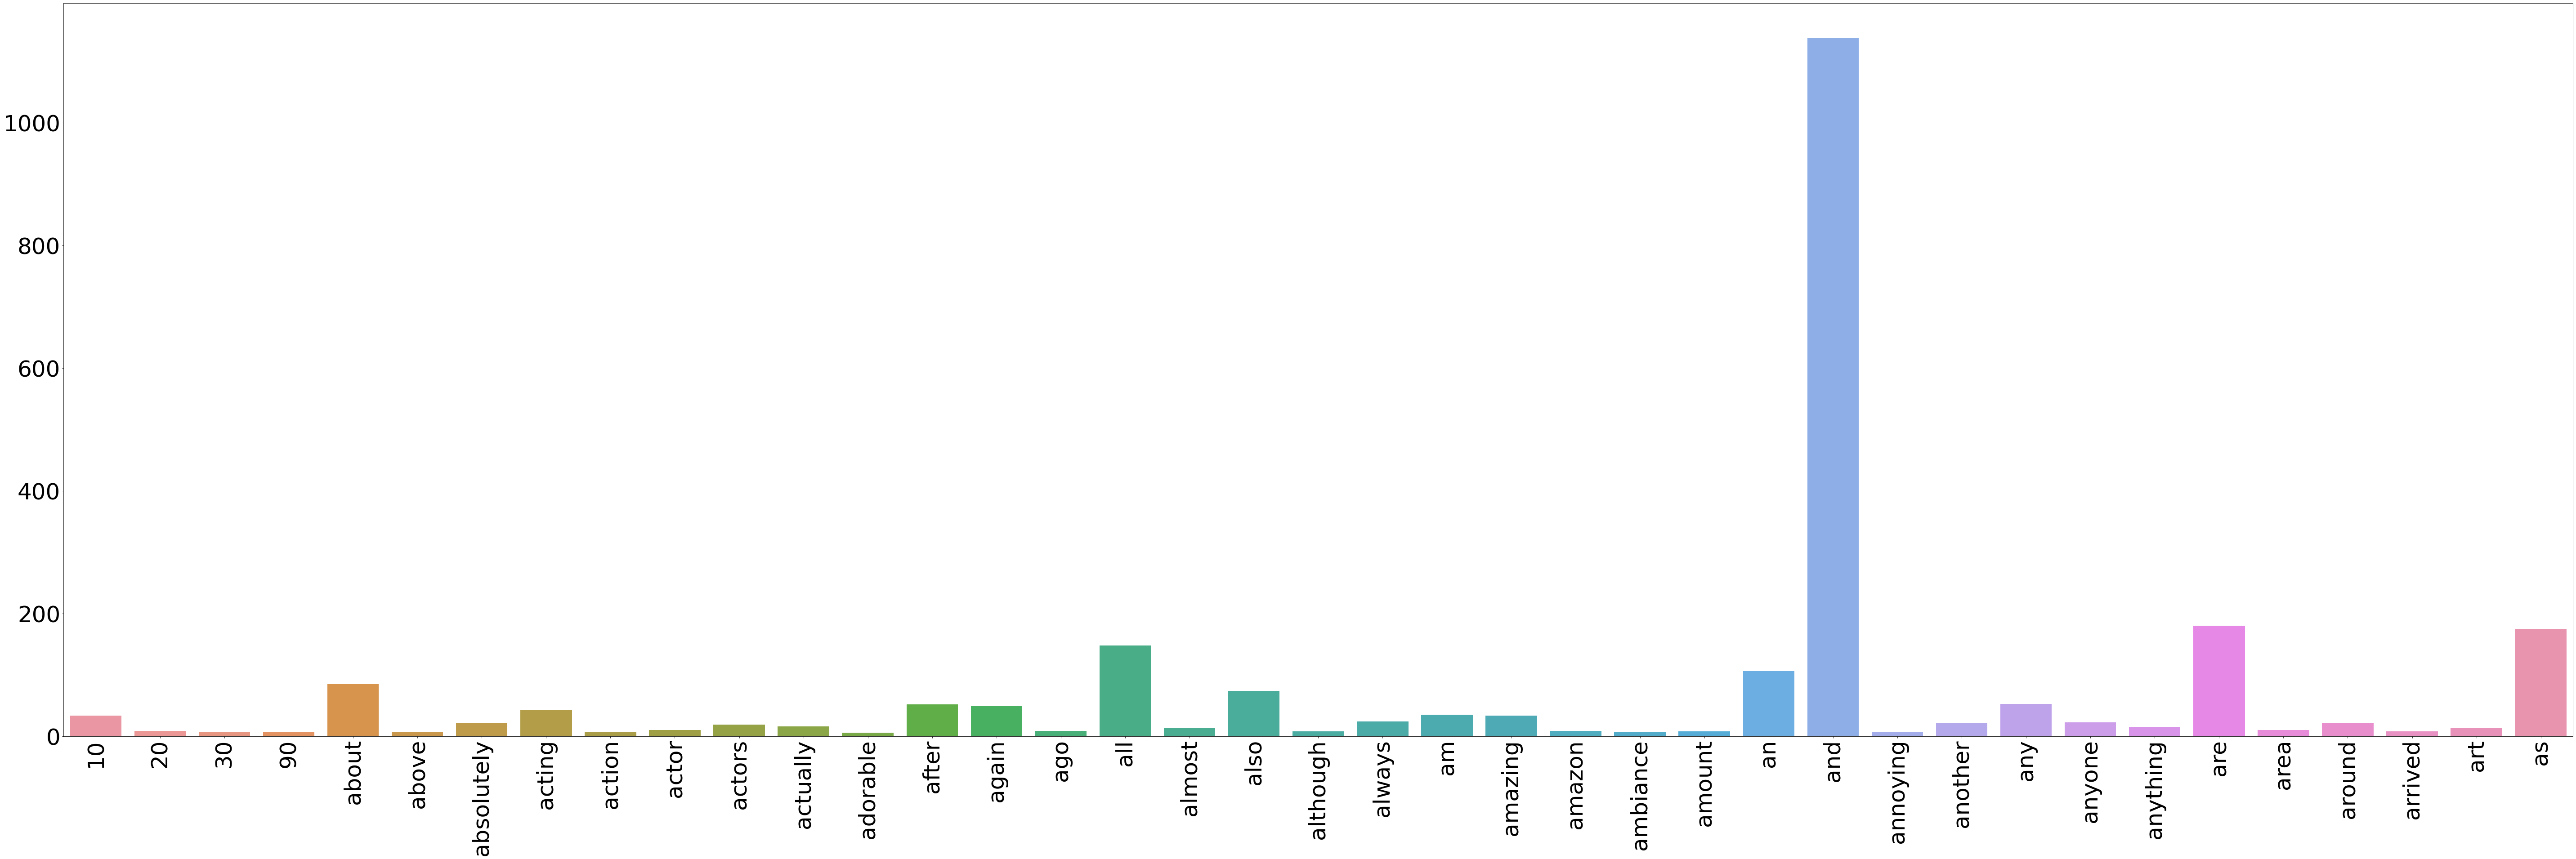

In [79]:
# Answer here
sns.set_context(rc={"font.size":50})   
plt.subplots(figsize=(100, 30))
x_ = []
y_ = []
for i in range(300):
    if term_frequencies[i] > 5:
        x_.append(count_vect.get_feature_names()[i])
        y_.append(term_frequencies[i])
g = sns.barplot(x=x_, y=y_)
g.set_xticklabels(x_, rotation = 90);

# >>> Exercise 15 (take home):
Additionally, you can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called long tail (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



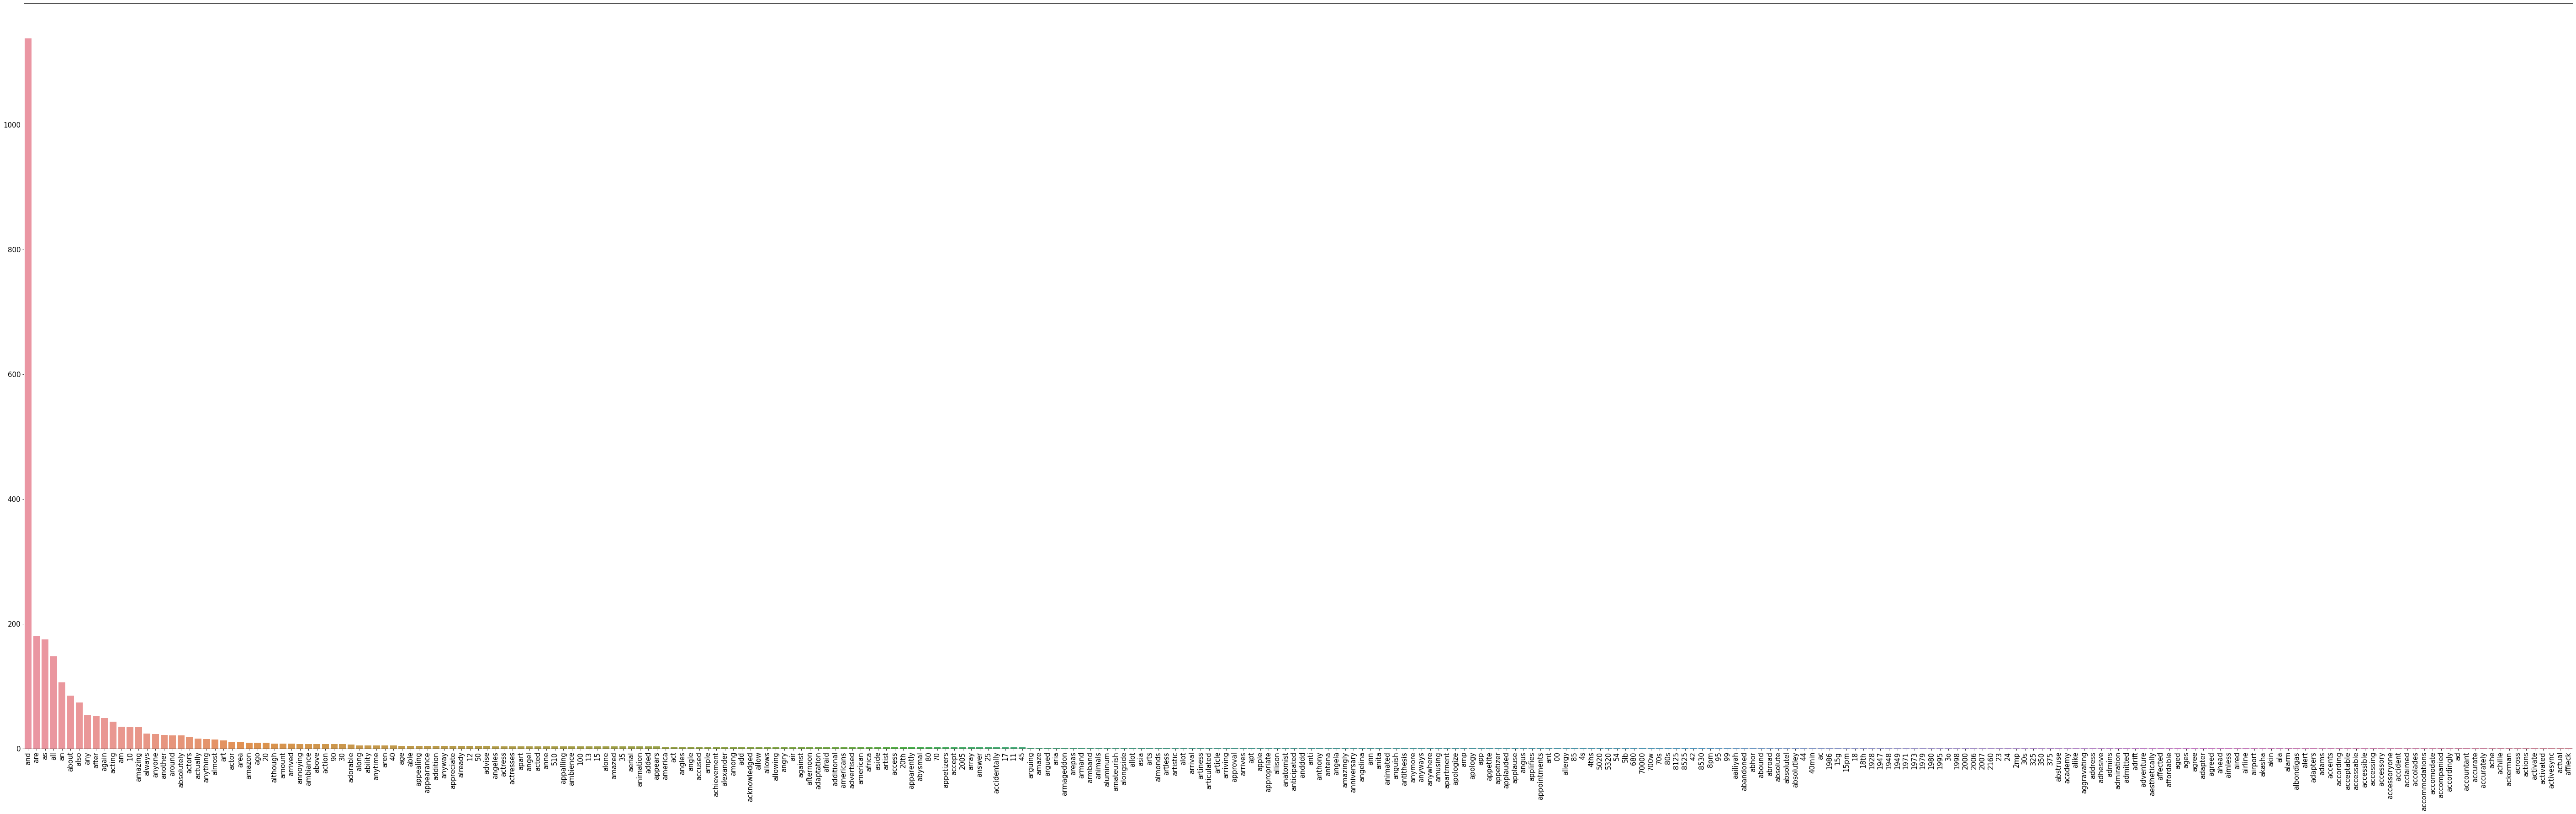

In [80]:
freq = {'name': count_vect.get_feature_names()[:300] ,
        'freq': term_frequencies[:300]}
df = pd.DataFrame(freq, columns = ['name', 'freq'])
final_df = df.sort_values(by=['freq'], ascending=False)
sns.set_context(rc={"font.size":15})   
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=list(final_df['name']), y=list(final_df['freq']))
g.set_xticklabels(list(final_df['name']), rotation = 90);

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [81]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.Web)
mlb.classes_
X['bin_category'] = mlb.transform(X['Web']).tolist()
X[0:9]

Web                                          Sentences Label  \
0  amazon  So there is no way for me to plug it in here i...     0   
1  amazon                        Good case, Excellent value.     1   
2  amazon                             Great for the jawbone.     1   
3  amazon  Tied to charger for conversations lasting more...     0   
4  amazon                                  The mic is great.     1   
5  amazon  I have to jiggle the plug to get it to line up...     0   
6  amazon  If you have several dozen or several hundred c...     0   
7  amazon        If you are Razr owner...you must have this!     1   
8  amazon                Needless to say, I wasted my money.     0   

  bin_category  
0    [1, 0, 0]  
1    [1, 0, 0]  
2    [1, 0, 0]  
3    [1, 0, 0]  
4    [1, 0, 0]  
5    [1, 0, 0]  
6    [1, 0, 0]  
7    [1, 0, 0]  
8    [1, 0, 0]

In [82]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.Label)
mlb.classes_
X['bin_label'] = mlb.transform(X['Label']).tolist()
X[0:9]

Web                                          Sentences Label  \
0  amazon  So there is no way for me to plug it in here i...     0   
1  amazon                        Good case, Excellent value.     1   
2  amazon                             Great for the jawbone.     1   
3  amazon  Tied to charger for conversations lasting more...     0   
4  amazon                                  The mic is great.     1   
5  amazon  I have to jiggle the plug to get it to line up...     0   
6  amazon  If you have several dozen or several hundred c...     0   
7  amazon        If you are Razr owner...you must have this!     1   
8  amazon                Needless to say, I wasted my money.     0   

  bin_category bin_label  
0    [1, 0, 0]       [0]  
1    [1, 0, 0]       [1]  
2    [1, 0, 0]       [1]  
3    [1, 0, 0]       [0]  
4    [1, 0, 0]       [1]  
5    [1, 0, 0]       [0]  
6    [1, 0, 0]       [0]  
7    [1, 0, 0]       [1]  
8    [1, 0, 0]       [0]

# 6. Data Exploration

In [83]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['Sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['Sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['Sentences']
document_to_transform_3.append(random_record_3)

In [84]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [85]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [86]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


# Third: 
please attempt the following tasks on the new dataset. This part is worth 30% of your grade.
Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

1. Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas

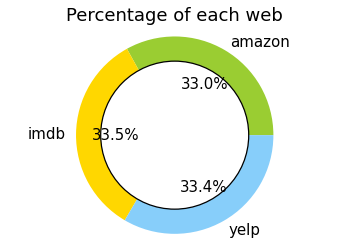

In [87]:
labels = 'amazon', 'imdb', 'yelp'
sizes = [len(X.loc[X['Web']=='amazon']), len(X.loc[X['Web']=='imdb']), len(X.loc[X['Web']=='yelp'])]
colors = ['yellowgreen', 'gold', 'lightskyblue']
explode = (0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%')
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)

fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.title('Percentage of each web')
plt.axis('equal')
plt.show() 

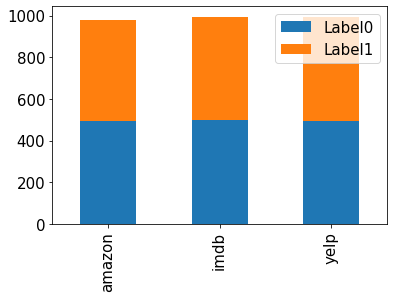

In [88]:
A_ = X.loc[X['Web']=='amazon']
I_ = X.loc[X['Web']=='imdb']
Y_ = X.loc[X['Web']=='yelp']
label0 = [len(A_.loc[X['Label']=='0']), len(I_.loc[X['Label']=='0']), len(Y_.loc[X['Label']=='0'])]
label1 = [len(A_.loc[X['Label']=='1']), len(I_.loc[X['Label']=='1']), len(Y_.loc[X['Label']=='1'])]
index = ['amazon', 'imdb', 'yelp']
df = pd.DataFrame({'Label0': label0, 'Label1': label1}, index=index)
ax = df.plot.bar(stacked=True)

2. Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [89]:
# I print feature names in tfIdfVectorizer and sort their values
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tfIdfVectorizer = TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(X.Sentences)
print(tfIdfVectorizer.get_feature_names()[0:10])
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df.head(25))

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
              TF-IDF
converter   0.398617
unless      0.332056
plug        0.308745
in          0.295162
us          0.275464
way         0.249126
go          0.231470
me          0.228603
by          0.223335
no          0.223335
here        0.222716
there       0.207538
so          0.187328
for         0.156619
to          0.127389
is          0.120693
it          0.119531
the         0.086502
poured      0.000000
powerhouse  0.000000
plus        0.000000
powerful    0.000000
power       0.000000
powdered    0.000000
poet        0.000000


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [90]:
# I print document matrix
df_tfidf = pd.DataFrame(tfIdf.toarray(),columns=tfIdfVectorizer.get_feature_names())
print("TFIDF")
df_tfidf[0:10]

TFIDF


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



00   10  100   11   12   13   15  15g  15pm   17  ...  yucky  yukon  yum  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0    0.0  0.0   

   yummy  yun  z500a  zero  zillion  zombie  zombiez  
0    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
1    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
2    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
3    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
4    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
5    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
6    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
7    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
8    0.0  0.0    0.0   0.0      0.0     0.0      0.0  
9    0.0  0.0    0.0   0.0      0.0     0.0      0.0  

[10 rows x 5153 columns]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



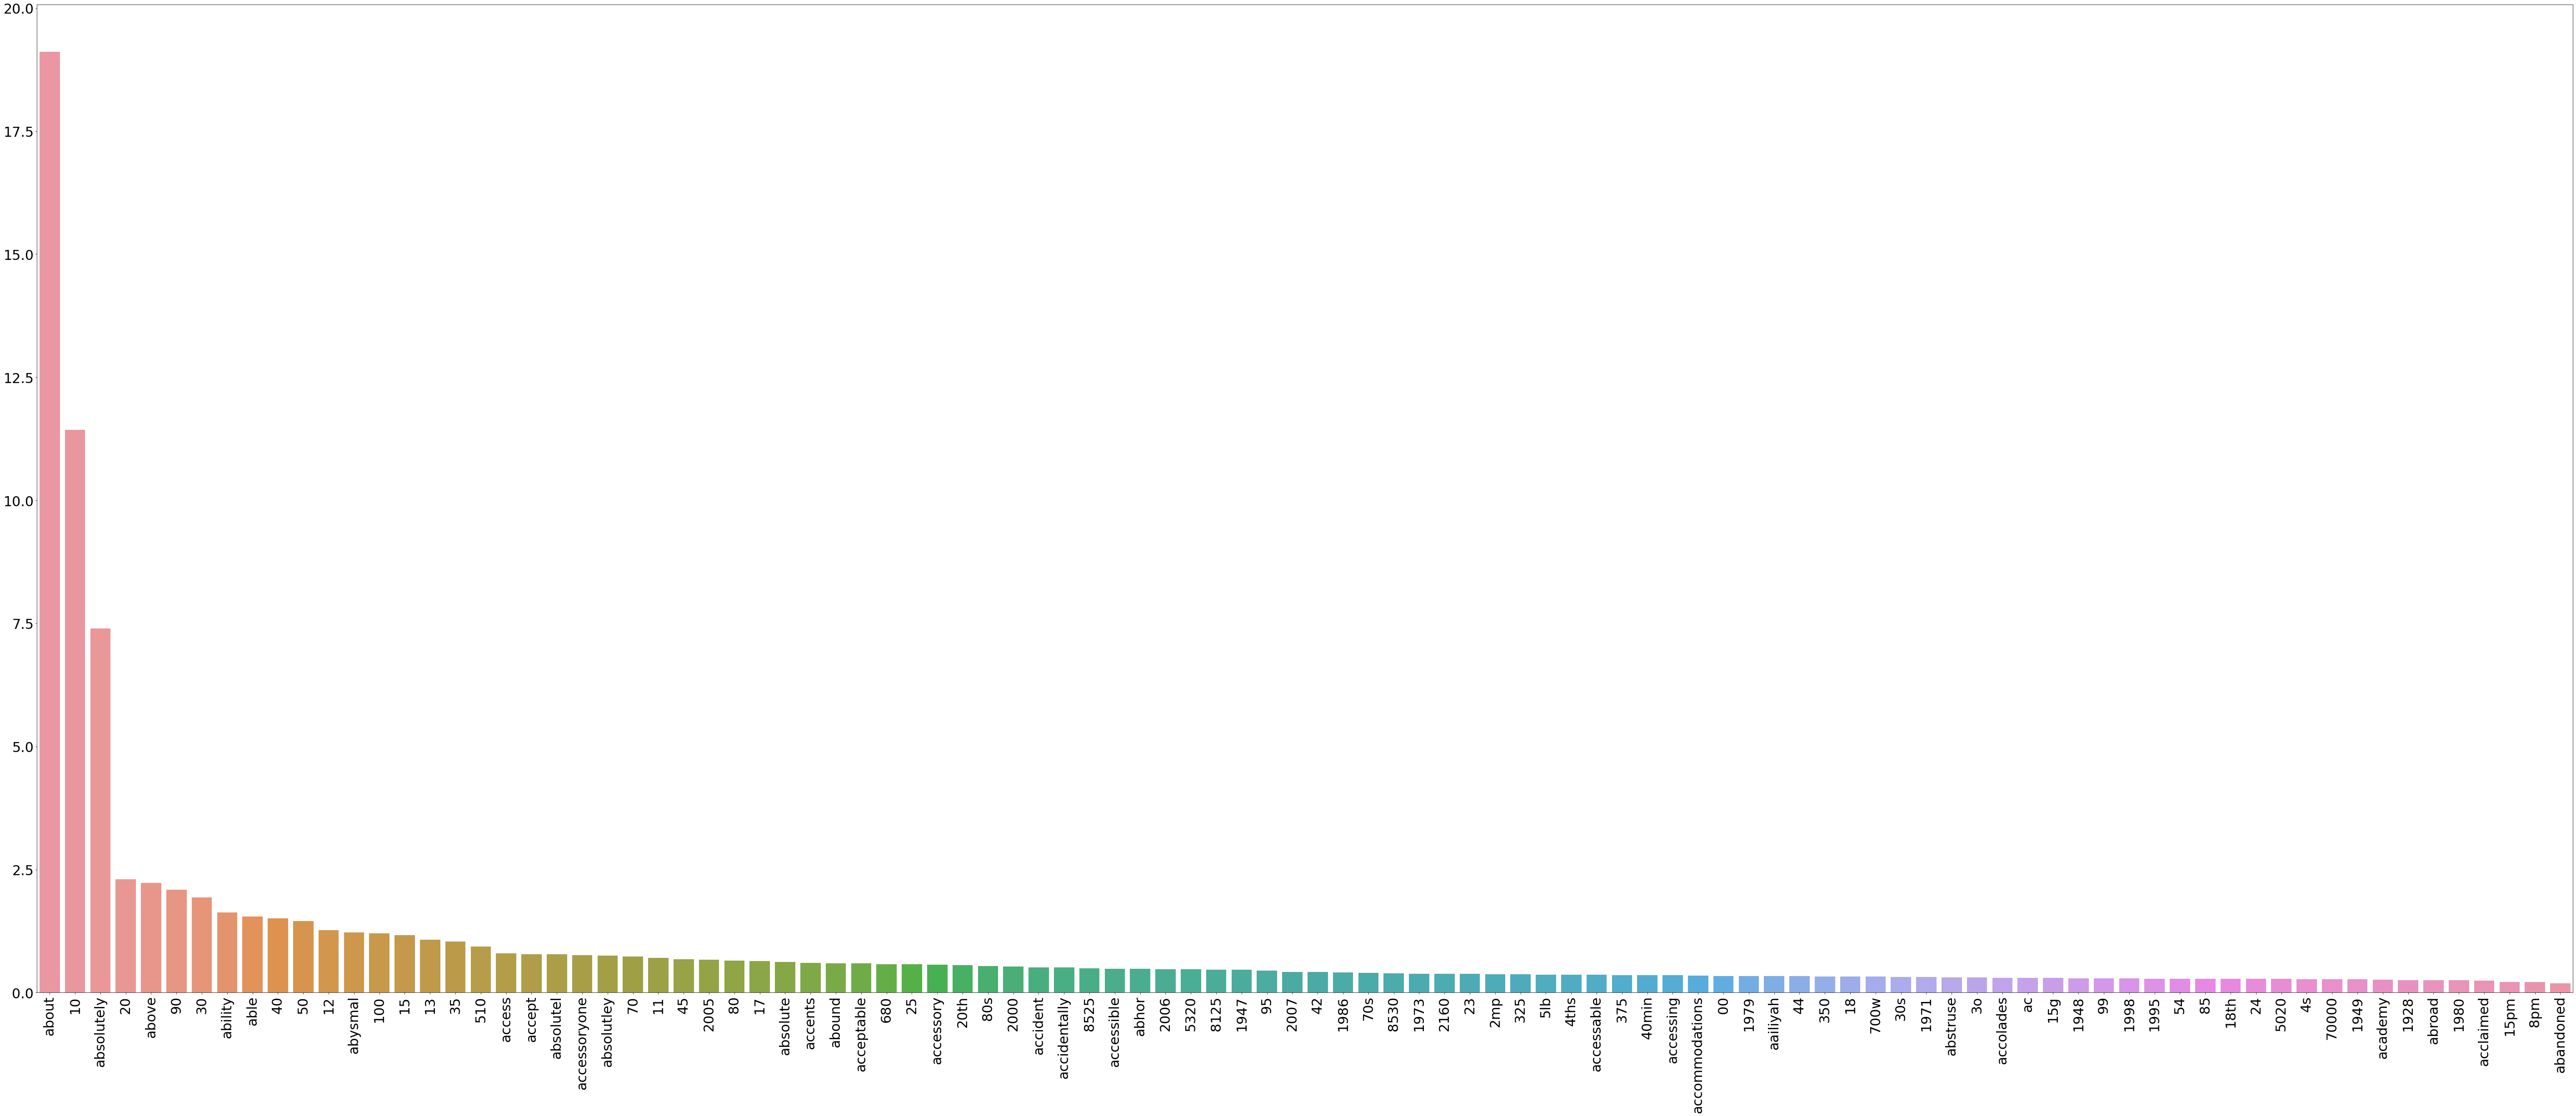

In [91]:
#Sort the terms on the x-axis by the sum of the values of TF-IDF
tf_idfs = []
for j in range(0,tfIdf.shape[1]):
    tf_idfs.append(sum(tfIdf[:,j].toarray()))
tf_idfs = np.asarray(tfIdf.sum(axis=0))[0]

tf_idf = {'name': tfIdfVectorizer.get_feature_names()[:100] ,
        'TFIDF': tf_idfs[:100]}

df = pd.DataFrame(tf_idf, columns = ['name', 'TFIDF'])
final_df = df.sort_values(by=['TFIDF'], ascending=False)
sns.set_context(rc={"font.size":30})   
plt.subplots(figsize=(100, 40))
g = sns.barplot(x=list(final_df['name']), y=list(final_df['TFIDF']))
g.set_xticklabels(list(final_df['name']), rotation = 90);

3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

In [92]:
#Implement a simple Naive Bayes classifier by TF-IDF features
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_ = df_tfidf.values
y_ = X['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1187 points : 396


In [93]:
#Implement a simple Naive Bayes classifier by word frequency features features
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv_fit=cv.fit_transform(X.Sentences)

# print(cv_fit.toarray())
X_ = cv_fit.toarray()
y_ = X['Label'].values
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.4, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 1187 points : 423


I try different test_size, when test_size < 0.5, the accuracy by TF-IDF features is higher than word frequency features.
However, when test_size >= 0.5, the accuracy by TF-IDF features is lower than word frequency features.

# Fourth: 
In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? This part is worth 10% of your grade.

My answer:

Although the techniques teached by TA are really useful, I think there are still three points that are also important when preprocessing:

1. When dealing with missing value, besides drop all the missing values, we could also fill them.
Ex: df.fillna(0) -> fill zero in missing values, df[].fillna(df[].mean() -> fill mean value in missing values.)

2. We can also apply normalization or standardization when preprocessing.

3. Sometimes we can improve accuracy by shuffling the data before spliting training and testing data .

